<a href="https://colab.research.google.com/github/AlejandroHerrera15/PROYECTO_IA/blob/main/01_exploraci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KAGGLE COMPETENCIA

## Costa Rican Household Poverty Level Prediction
Can you identify which households have the highest need for social welfare assistance?

https://www.kaggle.com/c/costa-rican-household-poverty-prediction

In [4]:
!pip install kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alejandroherrerar","key":"a266538c9ed8b4d58aa6d5b3bcf32743"}'}

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle competitions download -c adams-sose23

 98% 220M/225M [00:02<00:00, 101MB/s] 
100% 225M/225M [00:02<00:00, 89.8MB/s]


In [7]:
!unzip adams-sose23

Archive:  adams-sose23.zip
  inflating: reviews.csv             
  inflating: test.csv                
  inflating: train.csv               


In [1]:
#Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
df_train = pd.read_csv('train.csv')
df_train.head()

,name,summary,space,description,experiences_offered,neighborhood_overview,transit,house_rules,picture_url,host_id,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,reviews_per_month,listing_id
0,Attic Room in historic Greenwich,The room does not have a door but its own disc...,Double room available in historic royal Greenw...,The room does not have a door but its own disc...,business,NaN,Parking is restricted in London. Visitors park...,no shoes on carpets no food in attic room no o...,https://a0.muscache.com/im/pictures/20045164/7...,2167992,...,95.0,10.0,10.0,10.0,10.0,10.0,10.0,strict_14_with_grace_period,2.37,9Q1RD6H7IO
1,Lovely Garden Studio Private Access,"Garden studio with private entrance, 5 minutes...","Beautiful studio with a king size bed, a sofa ...","Garden studio with private entrance, 5 minutes...",none,Crouch End is a very hip and friendly neighbou...,Walk across the street to the W3 bus stop and ...,We'd love it if you would remove your shoes at...,https://a0.muscache.com/im/pictures/8d1ddcdc-f...,16148175,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,2.97,6XDPZPGLSR
2,Comfi apartment 2 close to wimbledon tennis court,NaN,NaN,NaN,none,NaN,NaN,1- No party or event allowed. 2-No smoking ins...,https://a0.muscache.com/im/pictures/e7e4a740-d...,272000199,...,84.0,9.0,9.0,10.0,10.0,9.0,8.0,strict_14_with_grace_period,1.73,SND9OPN6IY
3,Luxury room in the heart of London - SW4,Luxury first floor Victorian split level maiso...,"Your room will be fully furnished, and it will...",Luxury first floor Victorian split level maiso...,none,"Gail coffee shop, just round the corner as wel...",Happy to advise on things to do in London and ...,- Check-in after 18:30pm and no later than 20:...,https://a0.muscache.com/im/pictures/7c2b2fcc-e...,3361233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,NaN,SE3B7BXN9G
4,Excellent city Apartment with Private Patio,"NEW luxury apartment, with private outside pat...","A modern, well-equipped, cosy apartment close ...","NEW luxury apartment, with private outside pat...",none,NaN,NaN,"I am very happy for your visit, but please car...",https://a0.muscache.com/im/pictures/ca1494da-f...,94317022,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,strict_14_with_grace_period,2.32,E0C82VK0VF


In [9]:
df_train.shape

(55284, 42)

In [10]:
df_train.columns

Index(['name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'transit', 'house_rules', 'picture_url',
       'host_id', 'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'guests_included',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'cancellation_policy', 'reviews_per_month',
       'listing_id'],
      dtype='object')

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55284 entries, 0 to 55283
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         55270 non-null  object 
 1   summary                      52330 non-null  object 
 2   space                        38403 non-null  object 
 3   description                  53558 non-null  object 
 4   experiences_offered          55284 non-null  object 
 5   neighborhood_overview        35778 non-null  object 
 6   transit                      35477 non-null  object 
 7   house_rules                  31906 non-null  object 
 8   picture_url                  55284 non-null  object 
 9   host_id                      55284 non-null  int64  
 10  host_since                   55173 non-null  object 
 11  host_response_time           37482 non-null  object 
 12  host_response_rate           37482 non-null  object 
 13  host_is_superhos

# Descripción de variables

In [13]:
tabla = df_train.copy()
tabla.iloc[0:5,20:30]

,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities
0,51.47457,-0.01062,Townhouse,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Wifi,""Paid parking off premises"",Heating,Wash..."
1,51.58329,-0.12416,Guesthouse,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Free parking on premises"",Breakfast,..."
2,51.41634,-0.18567,Apartment,Entire home/apt,5,1.0,1.0,2.0,Real Bed,"{Wifi,Kitchen,""Paid parking off premises"",Heat..."
3,51.45622,-0.14137,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,Heating,Washer,""Smoke detecto..."
4,51.48114,-0.11219,Apartment,Entire home/apt,3,1.0,2.0,2.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",H..."


Al ver la tabla incial se pueden ver que algunas variables no se tendran en cuenta porque son descripciones de las residencias estas son el name, summary, space y description

In [14]:
tabla=df_train.copy()
tabla.drop(['name', 'summary', 'space', 'amenities', 'description','neighborhood_overview','transit','house_rules','picture_url','host_id','host_since'],axis=1,inplace=True)

In [15]:
len(tabla.columns)

31

# Variable respuesta

<ipython-input-17-6ec477f04b98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tabla['price'])


<Axes: xlabel='price', ylabel='Density'>

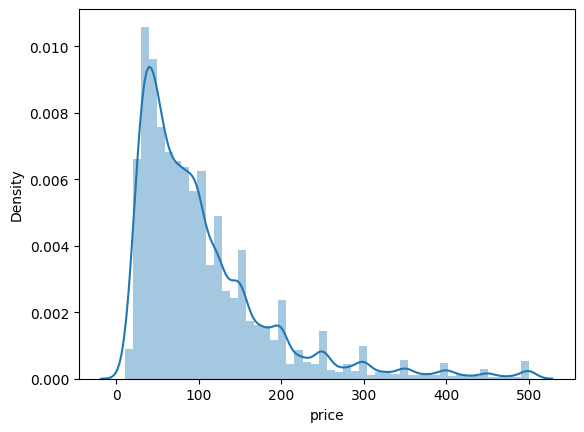

In [17]:
sns.distplot(tabla['price'])

In [ ]:
tabla['price'].describe()

count    55284.000000
mean       104.308751
std         83.740407
min         10.000000
25%         45.000000
50%         80.000000
75%        130.000000
max        500.000000
Name: price, dtype: float64

# Relacion variables numericas

<ipython-input-18-2fb012c98b20>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tabla.corr(),cmap = sns.cubehelix_palette(as_cmap=True), annot = True, fmt = ".2f")


<Axes: >

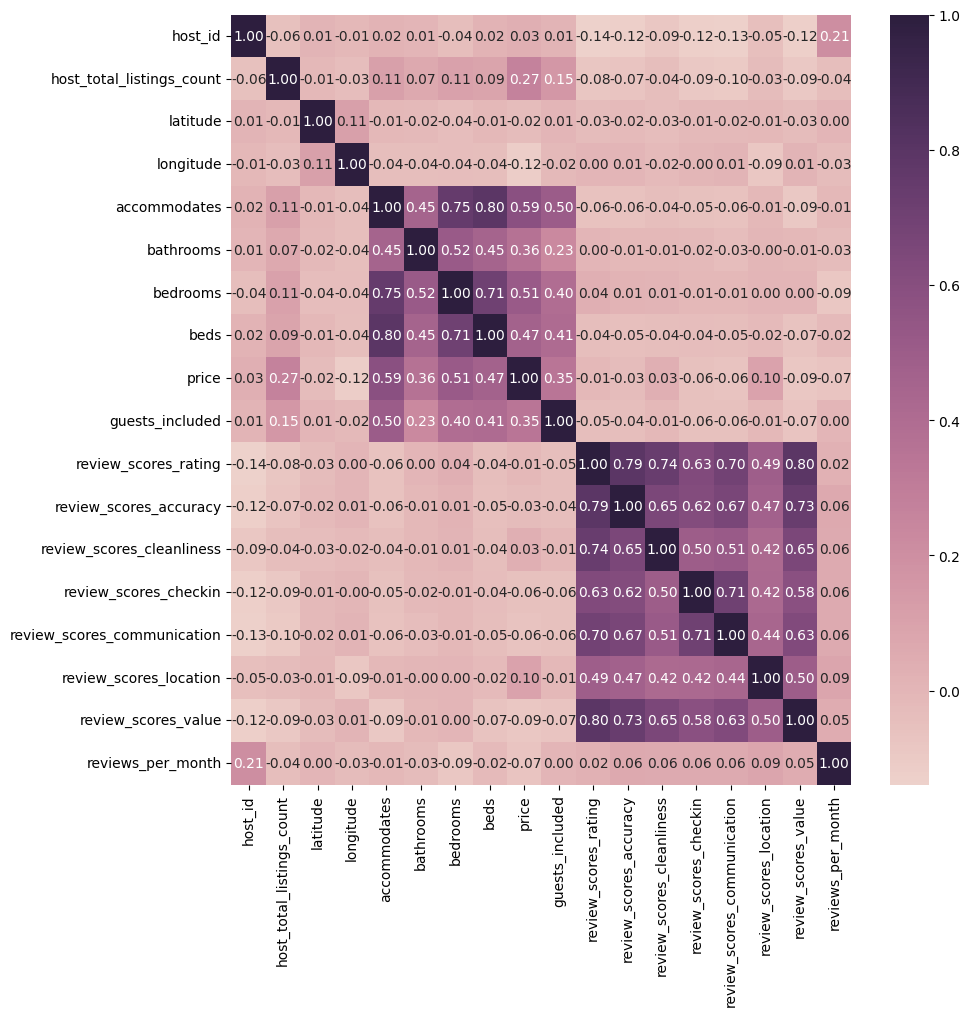

In [18]:
from matplotlib.pyplot import figure
columnasnumericas=tabla.select_dtypes(include=['int64', 'float64'])
figure(figsize=(10,10))
sns.heatmap(tabla.corr(),cmap = sns.cubehelix_palette(as_cmap=True), annot = True, fmt = ".2f")

In [19]:
tabla._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,55284.0,8.817998e+07,9.013224e+07,2697.00000,1.526397e+07,4.816502e+07,1.449050e+08,3.256719e+08
host_total_listings_count,55173.0,2.070448e+01,1.170297e+02,0.00000,1.000000e+00,2.000000e+00,5.000000e+00,1.321000e+03
latitude,55284.0,5.150997e+01,4.674128e-02,51.29479,5.148530e+01,5.151433e+01,5.153796e+01,5.168169e+01
longitude,55284.0,-1.269621e-01,9.351695e-02,-0.49668,-1.876325e-01,-1.245100e-01,-6.882000e-02,2.853900e-01
accommodates,55284.0,3.131756e+00,1.930209e+00,1.00000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,55214.0,1.283850e+00,5.665564e-01,0.00000,1.000000e+00,1.000000e+00,1.500000e+00,1.100000e+01
bedrooms,55222.0,1.373873e+00,8.594478e-01,0.00000,1.000000e+00,1.000000e+00,2.000000e+00,1.900000e+01
beds,55022.0,1.710661e+00,1.224301e+00,0.00000,1.000000e+00,1.000000e+00,2.000000e+00,2.100000e+01
price,55284.0,1.043088e+02,8.374041e+01,10.00000,4.500000e+01,8.000000e+01,1.300000e+02,5.000000e+02
guests_included,55284.0,1.574832e+00,1.263427e+00,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,4.600000e+01


In [20]:
tabla.isnull().sum()

name                              14
summary                         2954
space                          16881
description                     1726
experiences_offered                0
neighborhood_overview          19506
transit                        19807
house_rules                    23378
picture_url                        0
host_id                            0
host_since                       111
host_response_time             17802
host_response_rate             17802
host_is_superhost                111
host_total_listings_count        111
host_has_profile_pic             111
host_identity_verified           111
neighbourhood                    147
neighbourhood_cleansed             0
zipcode                         1272
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         70
bedrooms                          62
b

In [21]:
columnas_categoricas = tabla.select_dtypes(include=['object'])
print(columnas_categoricas)

                                                    name  \
0                       Attic Room in historic Greenwich   
1                    Lovely Garden Studio Private Access   
2      Comfi apartment 2 close to wimbledon tennis court   
3               Luxury room in the heart of London - SW4   
4            Excellent city Apartment with Private Patio   
...                                                  ...   
55279     Brixton/Camberwell DBL bedroom, brand new flat   
55280  End suite with private bathroom. Close to the ...   
55281                   The place full of a good energy!   
55282  Amazing 1BD apartment right next to Finsbury Park   
55283                   Serene Private Room with Ensuite   

                                                 summary  \
0      The room does not have a door but its own disc...   
1      Garden studio with private entrance, 5 minutes...   
2                                                    NaN   
3      Luxury first floor Victorian spl

In [22]:
## KEEPOUTPUT
ccols = [i for i in tabla.columns if not i in tabla._get_numeric_data()]
print (ccols)
for c in ccols:
    print ("%10s"%c, np.unique(tabla[c].dropna()))

['name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'transit', 'house_rules', 'picture_url', 'host_since', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode', 'property_type', 'room_type', 'bed_type', 'amenities', 'cancellation_policy', 'listing_id']
      name ['  Cosy well - located  double room ' ' 1 bedroom flat in Maida Vale '
 ' 2 Bed, Luxury central modern flat' ...
 '････☆ Perfectly Located 1 Bedroom Apartment ☆ ････'
 '････✪･Lovely 2 Bedroom Apartment - Fulham･✪ ･･･'
 'ﾛﾝﾄﾞﾝ市内西部､ｾﾝﾄﾗﾙ線ｼｪﾊﾟｰｽﾞ･ﾌﾞｯｼｭ駅より徒歩2分のﾌﾗﾝｽ人と暮らす小さな家']
   summary ['          Curious to experience what living in central London means? This is your ideal choice! Comfortable and big bedroom located in a 4 floors house where people with different nationalities and cultures magically mix and live together. 5 min/tube   '
 '       Stunning Large 2 Bed apartment